In [22]:
import pandas as pd
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import copy as cp
import warnings #supress warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("breast-cancer_csv.csv")

In [24]:
df.shape

(286, 10)

In [154]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [155]:
df = df.dropna()

In [156]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [25]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [26]:
df.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [27]:
cols_to_use = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat']
X = df[cols_to_use]

In [175]:
X

array([[2, 2, 2, ..., 1, 2, 0],
       [3, 0, 2, ..., 1, 0, 0],
       [3, 0, 6, ..., 0, 1, 0],
       ...,
       [1, 2, 5, ..., 1, 4, 0],
       [3, 2, 2, ..., 1, 1, 0],
       [3, 0, 7, ..., 0, 4, 0]], dtype=int64)

In [176]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
label_encoder = LabelEncoder()
cols_to_encode = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'breast', 'breast-quad', 'irradiat']
for column in cols_to_encode:
    X[column] = label_encoder.fit_transform(X[column])

In [30]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,2,2,2,0,1,3,1,2,0
1,3,0,2,0,0,1,1,0,0
2,3,0,6,0,0,2,0,1,0
3,2,2,6,0,1,3,1,1,1
4,2,2,5,4,1,2,0,4,0
...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,1,2,0,1,0
282,3,2,4,4,1,2,0,1,1
283,1,2,5,5,1,2,1,4,0
284,3,2,2,0,0,2,1,1,0


In [177]:
Y = df.Class

In [32]:
Y = label_encoder.fit_transform(Y)

In [33]:
X = X.to_numpy()

In [34]:
clf = MixedNB()

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cv_results = cross_validate(clf,X,Y,scoring = ["accuracy", "f1", "precision", "recall"],cv=kfold)
print("test accuracy")
print(cv_results['test_accuracy'])
print("test f1")
print(cv_results['test_f1'])
print("test precision")
print(cv_results['test_precision'])
print("test recall")
print(cv_results['test_recall'])
# Array of scores of the estimator for each run of the cross validation.

test accuracy
[0.79310345 0.66666667 0.77192982 0.73684211 0.70175439]
test f1
[0.64705882 0.34482759 0.62857143 0.54545455 0.48484848]
test precision
[0.6875     0.3125     0.6875     0.69230769 0.44444444]
test recall
[0.61111111 0.38461538 0.57894737 0.45       0.53333333]


In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def kfoldScores(model, X, Y):
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_validate(model,X,Y,scoring = ["accuracy", "f1", "precision", "recall"],cv=kfold,return_estimator=True)
    print("test accuracy")
    print(cv_results['test_accuracy'])
    print('test accuracy mean:{}'.format(np.mean(cv_results['test_accuracy'])))
    print("test f1")
    print(cv_results['test_f1'])
    print('test f1 mean:{}'.format(np.mean(cv_results['test_f1'])))
    print("test precision")
    print(cv_results['test_precision'])
    print('test pprecision mean:{}'.format(np.mean(cv_results['test_precision'])))
    print("test recall")
    print(cv_results['test_recall'])
    print('test recall mean:{}'.format(np.mean(cv_results['test_recall'])))
    return cv_results
# Array of scores of the estimator for each run of the cross validation.

In [52]:
def cross_val_predict(model,kfold, X, y):

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [53]:
def plot_confusion_matrix(actual_classes, predicted_classes, sorted_labels):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

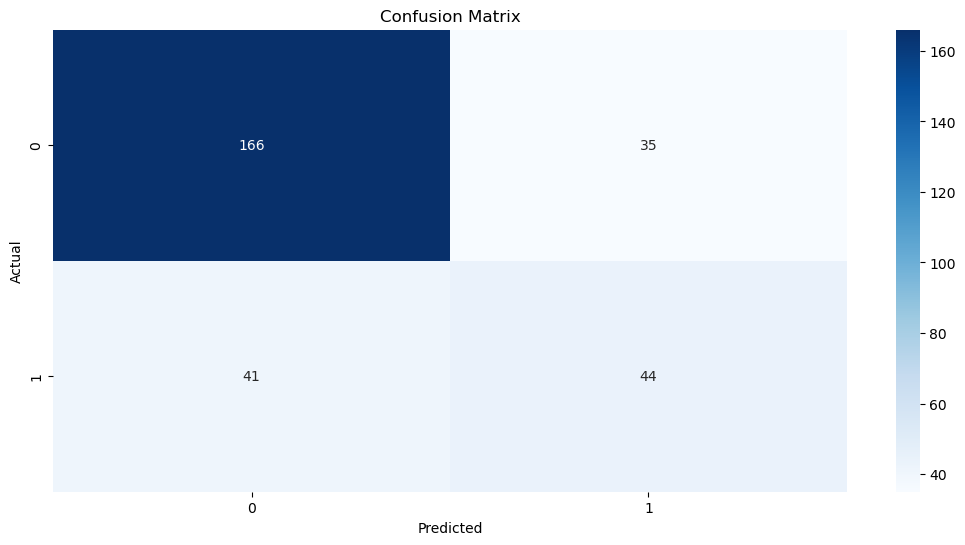

In [54]:
actual_classes, predicted_classes, _ = cross_val_predict(clf,kfold, X, Y)
plot_confusion_matrix(actual_classes, predicted_classes, [0,1])

# - 2 - KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
#class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', 
#algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn = KNeighborsClassifier(n_neighbors=9)

In [57]:
train_x,test_x, train_y, test_y = train_test_split(X,Y, random_state= 0, test_size =0.2)

In [58]:
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=9)

In [59]:
k_range = range(1,25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    scores.append(knn.score(test_x, test_y))

In [60]:
pred_y = knn.predict(test_x)

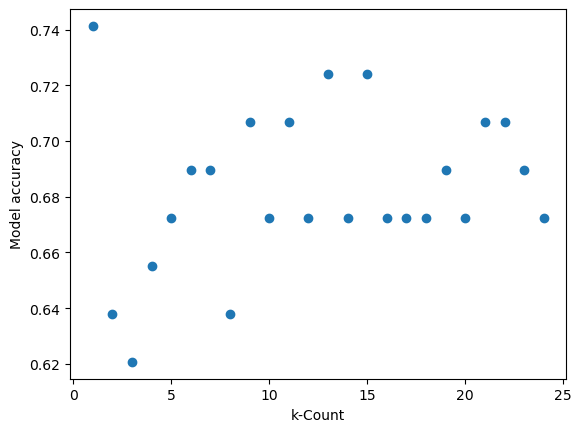

In [61]:
plt.figure()
plt.xlabel("k-Count")
plt.ylabel("Model accuracy")
plt.scatter(k_range, scores)

In [62]:
metrics.accuracy_score(test_y, pred_y)

0.6724137931034483

## - Cross validation

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)

In [64]:
cv_results_knn = kfoldScores(knn,X,Y)

test accuracy
[0.72413793 0.68421053 0.63157895 0.71929825 0.75438596]
test accuracy mean:0.7027223230490018
test f1
[0.38461538 0.18181818 0.22222222 0.46666667 0.46153846]
test f1 mean:0.34337218337218334
test precision
[0.625      0.22222222 0.375      0.7        0.54545455]
test pprecision mean:0.4935353535353535
test recall
[0.27777778 0.15384615 0.15789474 0.35       0.4       ]
test recall mean:0.2679037336932074


In [65]:
best_model_fit = cv_results_knn['estimator'][4]

In [66]:
best_model_fit.predict(test_x)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [67]:
metrics.accuracy_score(test_y, best_model_fit.predict(test_x))

0.7931034482758621

### - Looking for the best K

In [68]:
k_range = range(1,20) 
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores =  cross_val_score(knn , X, Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

In [69]:
k_scores

[0.6502722323049002,
 0.6993345432546885,
 0.6714458560193588,
 0.699395039322444,
 0.7237749546279492,
 0.6958257713248639,
 0.7098003629764065,
 0.6957652752571082,
 0.7027828191167573,
 0.6958862673926195,
 0.702843315184513,
 0.6993345432546885,
 0.702843315184513,
 0.6958257713248639,
 0.699395039322444,
 0.6854809437386569,
 0.6994555353901996,
 0.6958862673926195,
 0.7029038112522686]

<AxesSubplot:>

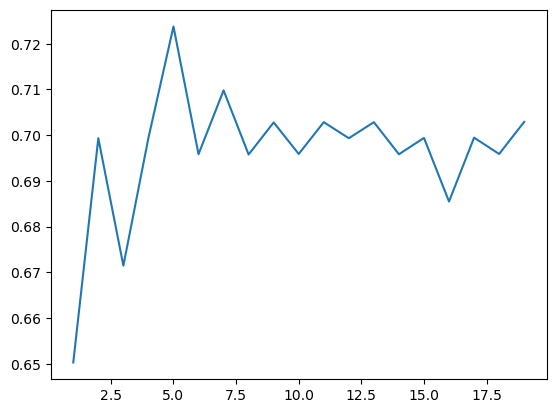

In [70]:
sns.lineplot(x = k_range, y = k_scores)

- On peut remarquer que k = 5 nous donne le meilleur résultat d'aprés le graphe

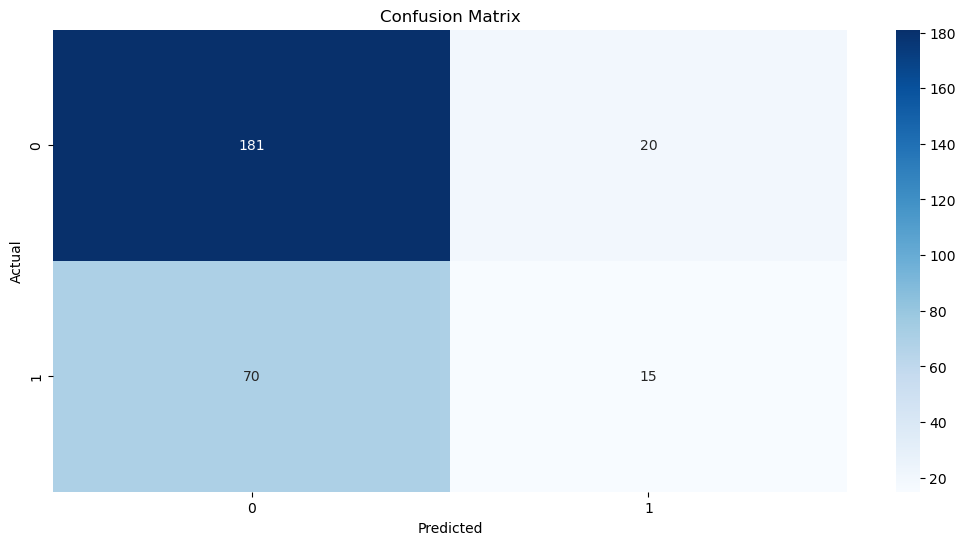

In [71]:
actual_classes, predicted_classes, _ = cross_val_predict(knn,kfold, X, Y)
plot_confusion_matrix(actual_classes, predicted_classes, [ 0 , 1 ])

## - Improving KNN using gridSearchCV

In [72]:
knn = KNeighborsClassifier()

In [74]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [75]:
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [76]:
weight_options = ['uniform', 'distance']

In [77]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [78]:
print(grid.best_score_)
print(grid.best_params_)

0.7238916256157636
{'n_neighbors': 5, 'weights': 'uniform'}



# - 3 - Logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [80]:
lg.fit(train_x, train_y)

LogisticRegression()

In [81]:
pred_y_lg = lg.predict(test_x)

In [82]:
metrics.accuracy_score(test_y, pred_y_lg)

0.7758620689655172

In [83]:
cv_results_lg = kfoldScores(lg,X,Y)

test accuracy
[0.81034483 0.66666667 0.68421053 0.73684211 0.64912281]
test accuracy mean:0.709437386569873
test f1
[0.56       0.24       0.35714286 0.44444444 0.23076923]
test f1 mean:0.3664713064713065
test precision
[1.         0.25       0.55555556 0.85714286 0.27272727]
test pprecision mean:0.5870851370851371
test recall
[0.38888889 0.23076923 0.26315789 0.3        0.2       ]
test recall mean:0.27656320287899233


## - Improving the model using gridSearchCV

In [84]:
# parameter grid
# Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),# Inverse of regularization strength; smaller values specify stronger regularization.
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'], #solver — Algorithm to use in the optimization problem
}

In [85]:
logreg = LogisticRegression()
logrg = GridSearchCV(logreg,                   # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds

In [86]:
logrg.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [87]:
print("Tuned Hyperparameters :", logrg.best_params_)
print("Accuracy :",logrg.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.758840579710145


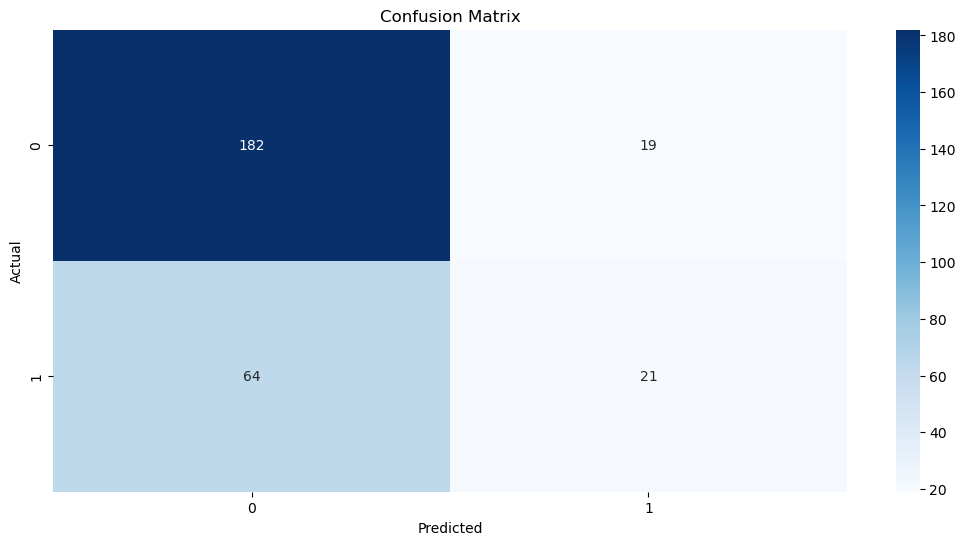

In [88]:
actual_classes, predicted_classes, _ = cross_val_predict(logrg,kfold, X, Y)
plot_confusion_matrix(actual_classes, predicted_classes, [ 0 , 1 ])

# - 4 - SVM

In [89]:
from sklearn.svm import SVC

In [90]:
SVM = SVC()

In [91]:
SVM.fit(train_x, train_y)

SVC()

In [92]:
pred_y_SVM = SVM.predict(test_x)

In [93]:
metrics.accuracy_score(test_y, pred_y_SVM)

0.6724137931034483

## - Using k-cross validation

In [94]:
SVM = SVC()
cv_results_SVM = kfoldScores(SVM,X,Y)

test accuracy
[0.70689655 0.63157895 0.71929825 0.71929825 0.73684211]
test accuracy mean:0.7027828191167574
test f1
[0.19047619 0.16       0.33333333 0.33333333 0.34782609]
test f1 mean:0.2729937888198758
test precision
[0.66666667 0.16666667 0.8        1.         0.5       ]
test pprecision mean:0.6266666666666667
test recall
[0.11111111 0.15384615 0.21052632 0.2        0.26666667]
test recall mean:0.18843004948268108


## - Using GridSearchCv to optimize the model

In [95]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
gridSVC = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
gridSVC.fit(train_x, train_y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [96]:
print(gridSVC.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(gridSVC.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [97]:
pred_y_SVC = gridSVC.predict(test_x)

In [98]:
metrics.accuracy_score(test_y, pred_y_SVC)

0.7241379310344828

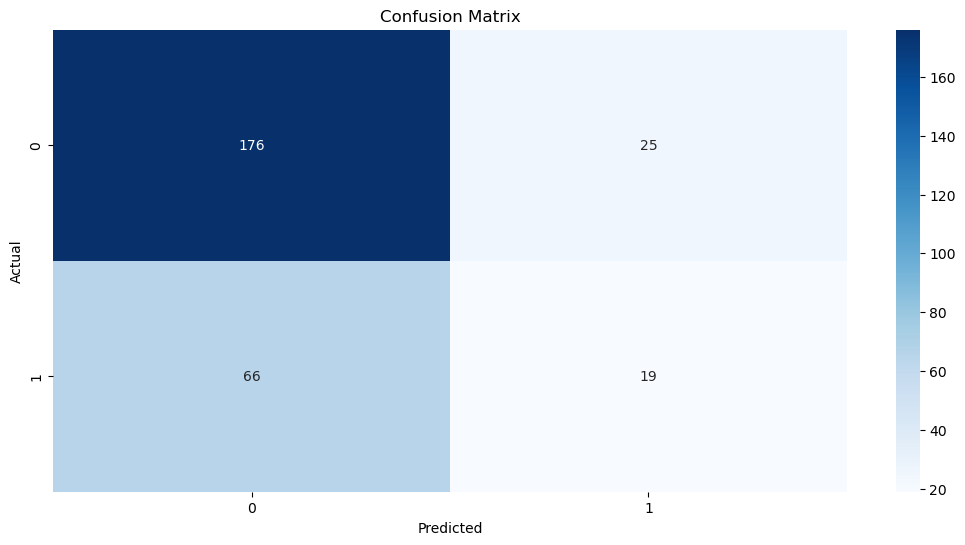

In [99]:
actual_classes, predicted_classes, _ = cross_val_predict(gridSVC,kfold, X, Y)
plot_confusion_matrix(actual_classes, predicted_classes, [ 0 , 1 ])

## - Decision tree classifier

In [100]:
from sklearn import tree

In [101]:
DT = tree.DecisionTreeClassifier()

In [102]:
cv_results_DT = kfoldScores(DT,X,Y)

test accuracy
[0.65517241 0.54385965 0.61403509 0.56140351 0.57894737]
test accuracy mean:0.5906836055656383
test f1
[0.52380952 0.23529412 0.38888889 0.3902439  0.33333333]
test f1 mean:0.3743139532235658
test precision
[0.45833333 0.19047619 0.41176471 0.38095238 0.28571429]
test pprecision mean:0.3454481792717086
test recall
[0.61111111 0.30769231 0.36842105 0.4        0.4       ]
test recall mean:0.41744489428699955


- Improving the model using grid search

In [128]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [130]:
grid_search_cv = GridSearchCV(DT, param_grid, verbose=1, cv=3)
grid_search_cv.fit(train_x, train_y)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=1)

In [132]:
final_model = grid_search_cv.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='log2')

In [134]:
dt_final = tree.DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='log2')

In [135]:
cv_results_DT = kfoldScores(dt_final,X,Y)

test accuracy
[0.77586207 0.66666667 0.73684211 0.61403509 0.73684211]
test accuracy mean:0.7060496067755596
test f1
[0.58064516 0.0952381  0.44444444 0.3125     0.44444444]
test f1 mean:0.3754544290834613
test precision
[0.69230769 0.125      0.75       0.41666667 0.5       ]
test pprecision mean:0.4967948717948718
test recall
[0.5        0.07692308 0.31578947 0.25       0.4       ]
test recall mean:0.30854251012145745


In [145]:
df_tree = df.drop('Class', axis='columns')

In [147]:
dt_final.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='log2')

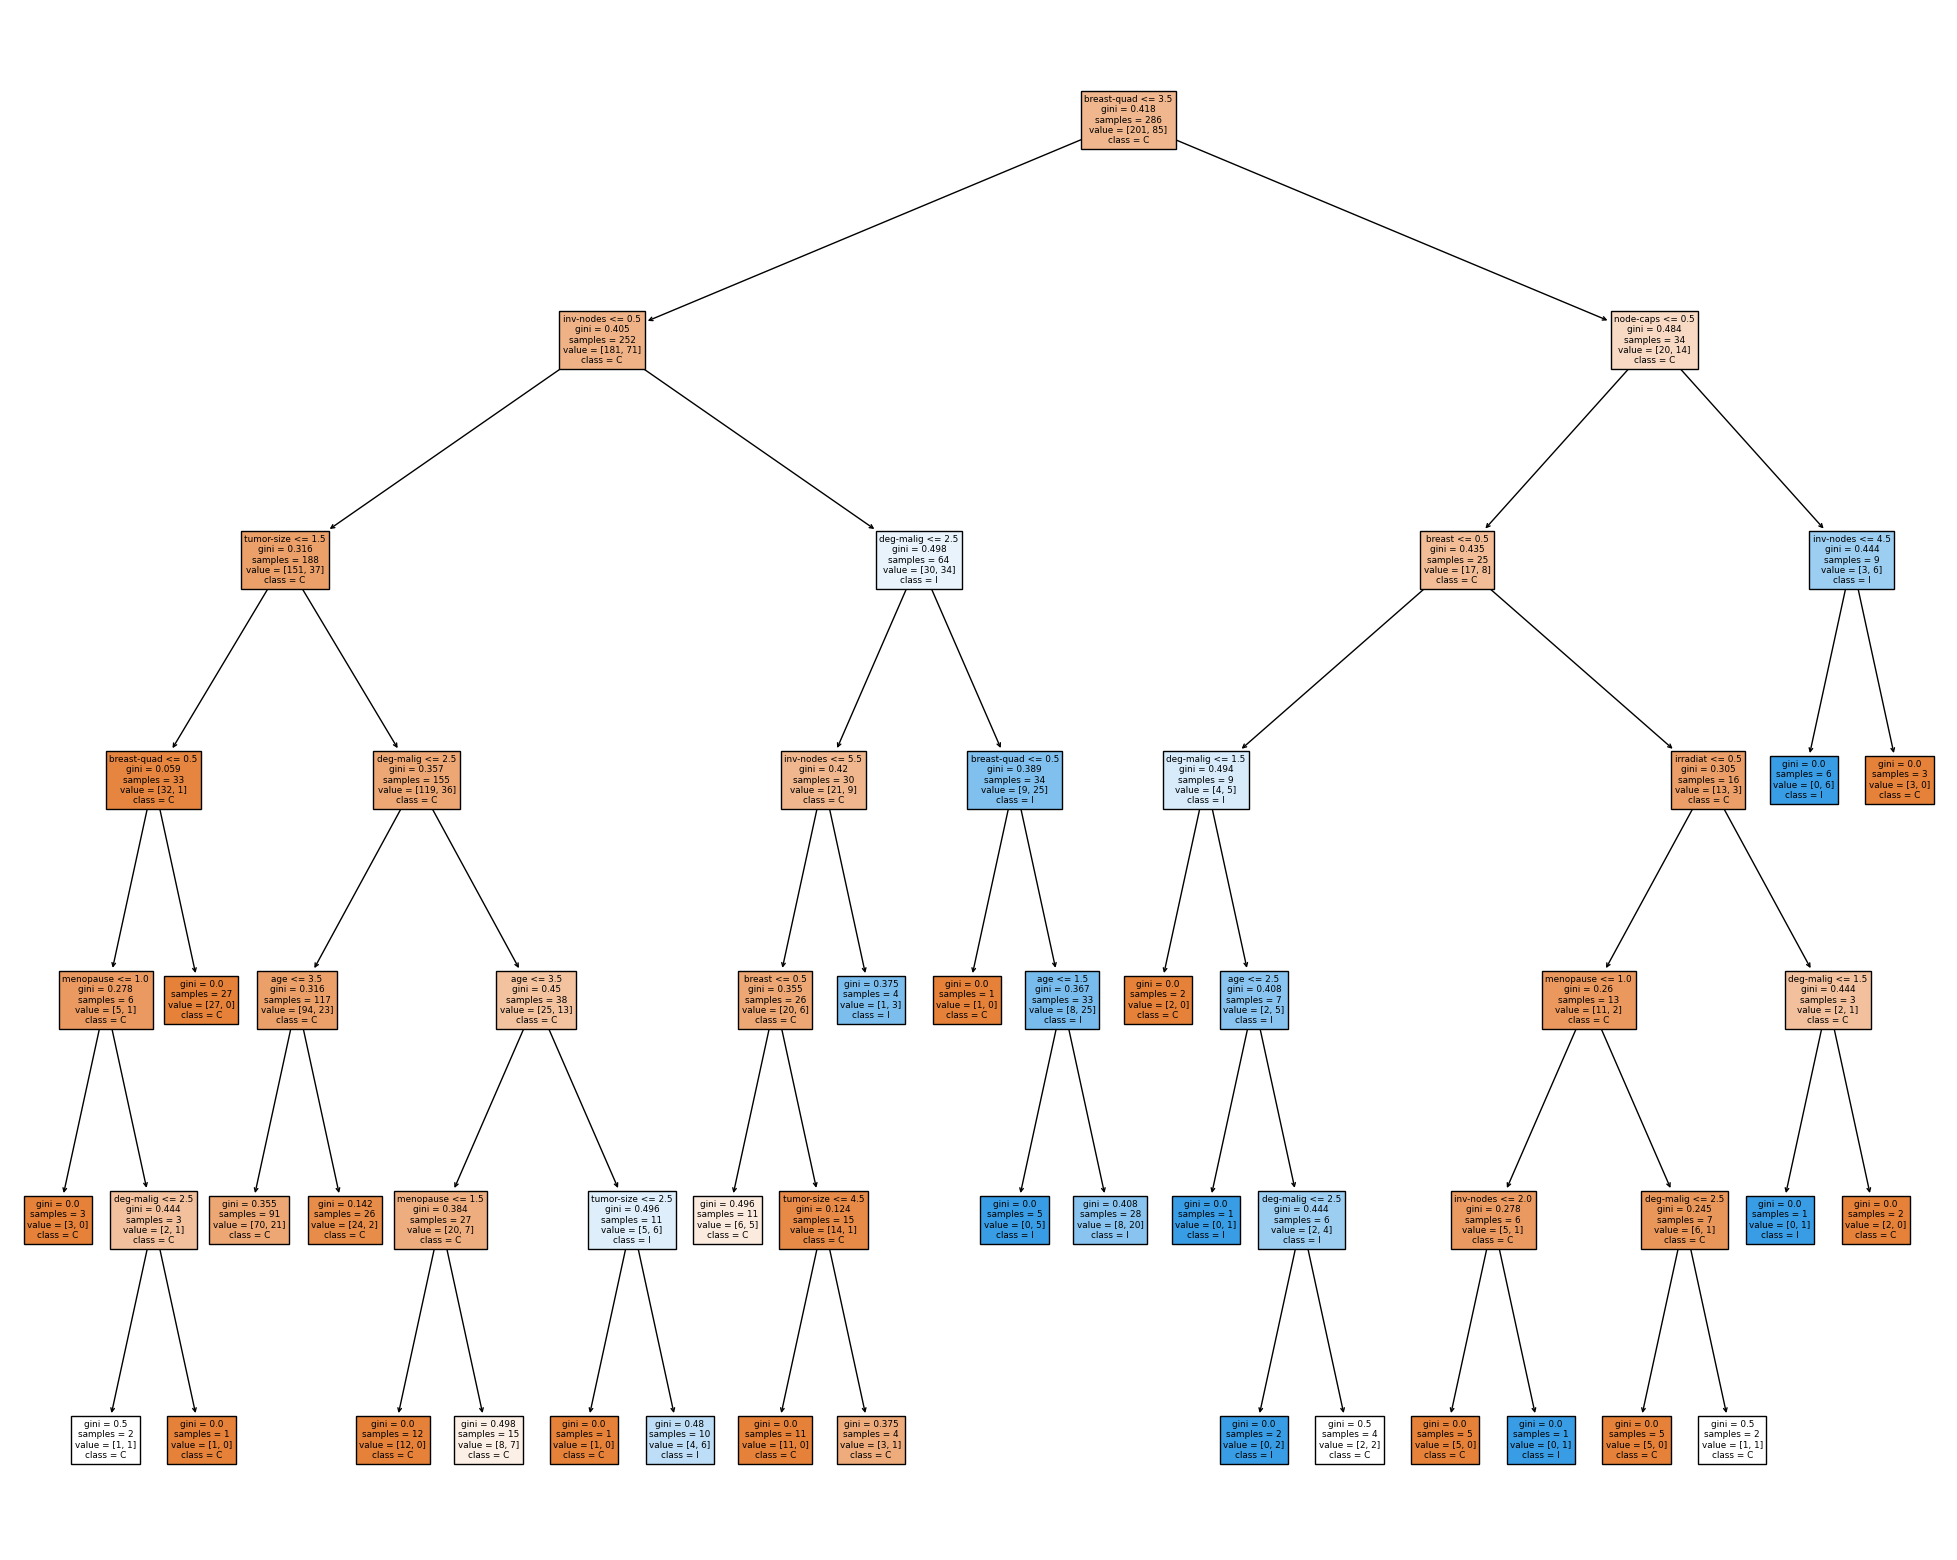

In [148]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_final, 
                   feature_names=df_tree.columns,  
                   class_names='Class',
                   filled=True)

### - Comparing the models

In [136]:
metrics = ['test_accuracy','test_f1', 'test_precision', 'test_recall']
cv_results_tables = [cv_results, cv_results_knn, cv_results_SVM, cv_results_lg, cv_results_DT]
dict_cv_results = {'mixed_naive_bayes':cv_results, 'knn':cv_results_knn, 'SVM':cv_results_SVM, 'lg':cv_results_lg, 'DT':cv_results_DT}

In [137]:
for model, cv_results in dict_cv_results.items():
    print(model)
    for metric in metrics:
        print(metric)
        print(np.mean(cv_results[metric]))

mixed_naive_bayes
test_accuracy
0.5906836055656383
test_f1
0.3743139532235658
test_precision
0.3454481792717086
test_recall
0.41744489428699955
knn
test_accuracy
0.7027223230490018
test_f1
0.34337218337218334
test_precision
0.4935353535353535
test_recall
0.2679037336932074
SVM
test_accuracy
0.7027828191167574
test_f1
0.2729937888198758
test_precision
0.6266666666666667
test_recall
0.18843004948268108
lg
test_accuracy
0.709437386569873
test_f1
0.3664713064713065
test_precision
0.5870851370851371
test_recall
0.27656320287899233
DT
test_accuracy
0.7060496067755596
test_f1
0.3754544290834613
test_precision
0.4967948717948718
test_recall
0.30854251012145745


In [138]:
lg_model = LogisticRegression()
lg_model.fit(train_x, train_y)

LogisticRegression()

In [139]:
clf = MixedNB()
clf.fit(train_x, train_y)

MixedNB(alpha=0.5, var_smoothing=1e-09)

## - Save SVM

In [164]:
clf_best_precision =SVC(C=1000, gamma=0.01)

In [165]:
clf_best_precision.fit(train_x, train_y)

SVC(C=1000, gamma=0.01)

In [166]:
filename1 = 'SVM_model.sav'
with open(filename1,'wb') as f1:
    pickle.dump(clf_best_precision, open(filename1, 'wb'))

In [167]:
# load the model from disk
loaded_model_SVM = pickle.load(open(filename1, 'rb'))
result1 = loaded_model_SVM.score(test_x, test_y)
print(result1)

0.7241379310344828


## - Save the model

In [169]:
import pickle
filename = 'lg_model.sav'
with open(filename,'wb') as f:
    pickle.dump(lg_model, open(filename, 'wb'))

## - Load the model

In [170]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.7758620689655172
